## **Logistic Regression**

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).

For Example: spam detection for emails, predicting if a customer will default in a loan, etc.


<img src = "https://static.javatpoint.com/tutorial/machine-learning/images/linear-regression-vs-logistic-regression.png">

Logistic regression is a supervised machine learning algorithm that accomplishes binary classification tasks by predicting the probability of an outcome, event, or observation

Determine the probability of heart attacks: With the help of a logistic model, medical practitioners can determine the relationship between variables such as the weight, exercise, etc., of an individual and use it to predict whether the person will suffer from a heart attack or any other medical complication.

<img src = "./img.png">

<img src="image_2.png">

### Decision Boundary

The sigmoid function returns a probability value between 0 and 1. This probability value is then mapped to a discrete class, which is either “0” or “1”. In order to map this probability value to a discrete class (e.g., pass/fail, yes/no, true/false), we select a threshold value. This threshold value is called the **decision boundary**. 

Above this threshold value, we map the probability values to class 1, and below it, we map values to class 0.

Mathematically, it can be expressed as follows:

p ≥ 0.5 => class = 1

p < 0.5 => class = 0



Generally, the decision boundary is set to 0.5. So, if the probability value is 0.8 (> 0.5), we map this observation to class 1. Similarly, if the probability value is 0.2 (< 0.5), we map this observation to class 0.


## **Geting Started with Logistic Regression**

In [25]:
import pandas as pd
from matplotlib import pyplot as plt

In [26]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


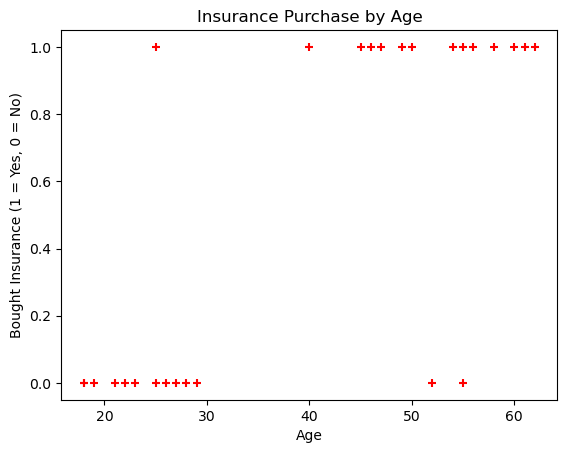

In [27]:
plt.scatter(df.age, df.bought_insurance, marker='+', color='red')
plt.title("Insurance Purchase by Age")
plt.xlabel("Age")
plt.ylabel("Bought Insurance (1 = Yes, 0 = No)")
plt.show()


<img src="./image5.png">

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8)


In [29]:
X_test

,age
26,23
17,58
5,56
23,45
7,60
24,50


In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [31]:
model.fit(X_train, y_train)


LogisticRegression()

In [32]:
y_predicted = model.predict(X_test)

In [33]:
y_predicted

array([0, 1, 1, 1, 1, 1])

In [36]:
import numpy as np

y_pred = model.predict(np.array([77]).reshape(1, -1))  # Reshape input
print(y_pred)


[1]


/home/muzammil/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [43]:
#Importing Libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## **Data Framing**

Read .csv data into a Dataframe

In [44]:
#reading our dataset in Alias: data.
data = pd.read_csv("./titanic.csv")

#Overviewing our dataset
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


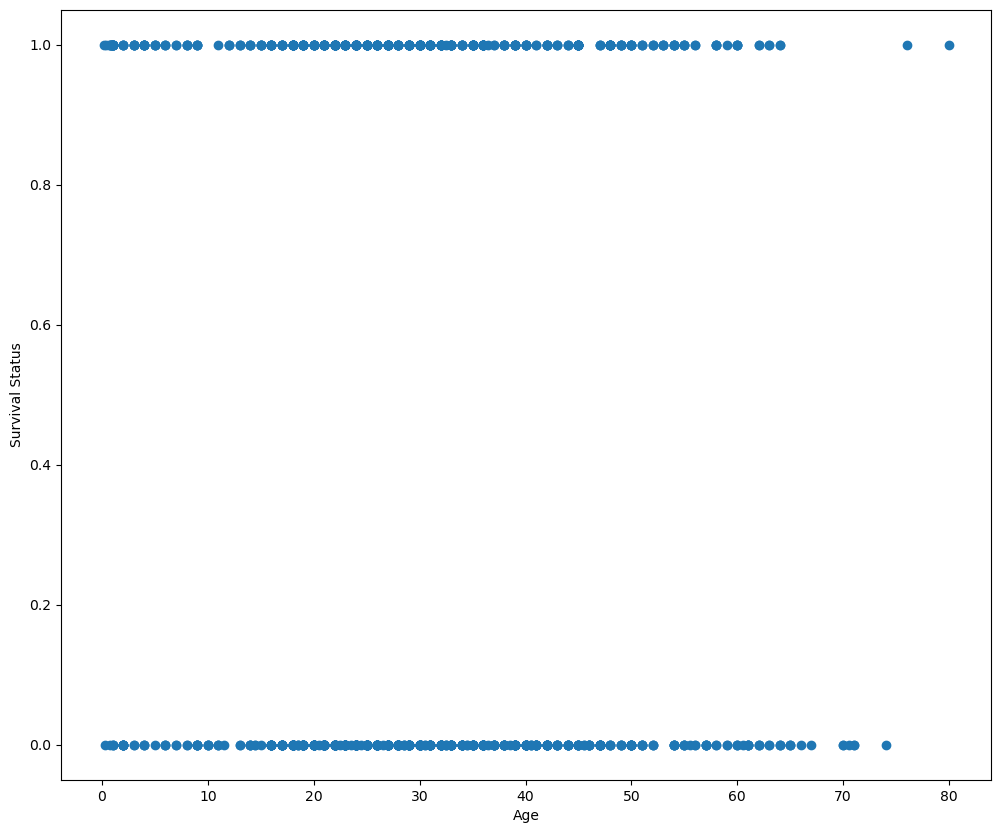

In [45]:
plt.subplots(figsize = (12,10))
plt.scatter(data['age'], data['survived']);
plt.xlabel("Age")
plt.ylabel('Survival Status');


## **Exploring Dataset**

In [46]:
data = data[["pclass","sex","age","survived"]]

In [47]:
data.shape

(1310, 4)

In [48]:
#Describing our dataset
data.describe()

,pclass,age,survived
count,1309.000000,1046.000000,1309.000000
mean,2.294882,29.881135,0.381971
std,0.837836,14.413500,0.486055
min,1.000000,0.166700,0.000000
25%,2.000000,21.000000,0.000000
50%,3.000000,28.000000,0.000000
75%,3.000000,39.000000,1.000000
max,3.000000,80.000000,1.000000


In [49]:
#Printing top 5 rows
data.head()


,pclass,sex,age,survived
0,1.0,female,29.0000,1.0
1,1.0,male,0.9167,1.0
2,1.0,female,2.0000,0.0
3,1.0,male,30.0000,0.0
4,1.0,female,25.0000,0.0


In [50]:
#Printing last 5 rows
data.tail()

,pclass,sex,age,survived
1305,3.0,female,NaN,0.0
1306,3.0,male,26.5,0.0
1307,3.0,male,27.0,0.0
1308,3.0,male,29.0,0.0
1309,NaN,NaN,NaN,NaN


In [51]:
#Finding  number of Nan or missing values in all columns
print(data.isna().sum(axis = 0))

# data.isna().sum(axis = 0)   # Nan values in every column
# data.isna().sum(axis = 1)   # Nan values in every row.

pclass        1
sex           1
age         264
survived      1
dtype: int64


## **Preprocessing: Dealing with Missing Values**

In [52]:
#Dropping Rows with Nan in all provided columns
data = data.dropna(subset=["sex","pclass","survived"])

In [53]:
#Again Finding  number of Nan or missing values in all columns
print(data.isna().sum(axis = 0))

pclass        0
sex           0
age         263
survived      0
dtype: int64


In [54]:
data.tail()

,pclass,sex,age,survived
1304,3.0,female,14.5,0.0
1305,3.0,female,NaN,0.0
1306,3.0,male,26.5,0.0
1307,3.0,male,27.0,0.0
1308,3.0,male,29.0,0.0


## **Preprocessing: Label Encoding**

Since in **sex** column we are not having a numerical vallue, just having male and female. Since, model doesn't accept text, wo we will transform text into binary labels.

In [55]:
data["sex"] = data["sex"].map({"male":1,"female":0})

data["sex"]

0       0
1       1
2       0
3       1
4       0
       ..
1304    0
1305    0
1306    1
1307    1
1308    1
Name: sex, Length: 1309, dtype: int64

In [56]:
data.head()

,pclass,sex,age,survived
0,1.0,0,29.0000,1.0
1,1.0,1,0.9167,1.0
2,1.0,0,2.0000,0.0
3,1.0,1,30.0000,0.0
4,1.0,0,25.0000,0.0


## **Features Extraction**

Extracting features

In [57]:
features = data[["sex","age","pclass"]]
target = data[["survived"]]
features.head()

,sex,age,pclass
0,0,29.0000,1.0
1,1,0.9167,1.0
2,0,2.0000,1.0
3,1,30.0000,1.0
4,0,25.0000,1.0


In [58]:
target.head()

,survived
0,1.0
1,1.0
2,0.0
3,0.0
4,0.0


## **Preprocessing: Imputation | Missing Values in Age**

Now since we are having so many missing values in our column of **age** we will Impute the entire column

In [59]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
features = imputer.fit_transform(features)

In [60]:
features

array([[ 0.    , 29.    ,  1.    ],
       [ 1.    ,  0.9167,  1.    ],
       [ 0.    ,  2.    ,  1.    ],
       ...,
       [ 1.    , 26.5   ,  3.    ],
       [ 1.    , 27.    ,  3.    ],
       [ 1.    , 29.    ,  3.    ]])

## **Splitting our dataset into Train & Test Set**

In [61]:
feature_train, feature_test, target_train, target_test = train_test_split(features,target)

In [64]:
feature_test

array([[ 1.        , 29.88113451,  3.        ],
       [ 1.        , 18.        ,  2.        ],
       [ 0.        ,  2.        ,  3.        ],
       [ 1.        , 19.        ,  3.        ],
       [ 1.        , 29.88113451,  1.        ],
       [ 1.        , 51.        ,  1.        ],
       [ 0.        , 15.        ,  3.        ],
       [ 1.        , 41.        ,  2.        ],
       [ 1.        , 25.        ,  2.        ],
       [ 1.        , 63.        ,  2.        ],
       [ 1.        , 19.        ,  2.        ],
       [ 1.        , 57.        ,  2.        ],
       [ 1.        , 29.88113451,  1.        ],
       [ 1.        , 23.        ,  2.        ],
       [ 1.        , 18.        ,  2.        ],
       [ 1.        , 29.88113451,  3.        ],
       [ 1.        , 71.        ,  1.        ],
       [ 1.        ,  1.        ,  3.        ],
       [ 1.        , 40.        ,  3.        ],
       [ 1.        , 10.        ,  3.        ],
       [ 1.        , 17.        ,  3.   

## **Training the Model**

We are using Logistic regression model as imported from sklearn library and then it's being trained on feature_train and target_train

In [63]:
model = LogisticRegression()
model.fit(feature_train, target_train)
predictions = model.predict(feature_test)
print(predictions)

[0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1.
 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1.]


/home/muzammil/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## **Printing an Error Matrix and Accuracy Score**

<img src ="https://glassboxmedicine.files.wordpress.com/2019/02/confusion-matrix.png?w=816" height =200>

In [205]:
print(confusion_matrix(target_test,predictions))
print(accuracy_score(target_test,predictions))

[[172  37]
 [ 44  75]]
0.7530487804878049
